In [1]:
# Code from: https://github.com/alexanderkuk/log-progress
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = str(index or '?')

In [2]:
from uct_protests.instantiation import model_instance

%matplotlib inline
import matplotlib.pyplot as plt

model = model_instance()

steps = 0
for _ in log_progress(range(1000), every=1):
    if model.running:
        model.step()

/Users/JoshBroomberg/Desktop/protest_abm/venv/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
/Users/JoshBroomberg/Desktop/protest_abm/venv/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=40,center=False).mean()


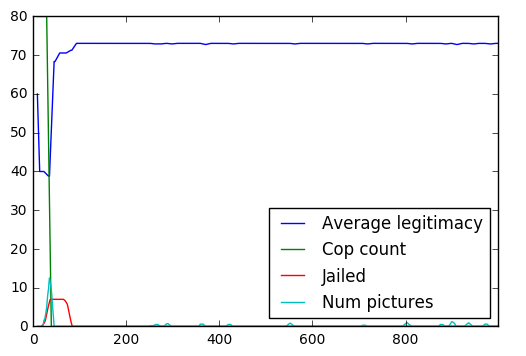

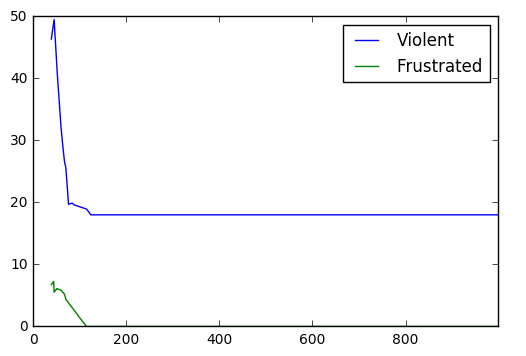

In [5]:
import pandas
data = model.datacollector.get_model_vars_dataframe()
# data.xs(198, level="AgentID").head()
pandas.rolling_mean(data[['Average legitimacy', 'Cop count', 'Jailed', 'Num pictures']], 10).plot()
pandas.rolling_mean(data[['Violent', 'Frustrated']], 40).plot()
